<a href="https://colab.research.google.com/github/JesvsCornejo/PredictiveHousingPriceModel/blob/main/Final_Project_COMP_395_Cluster_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

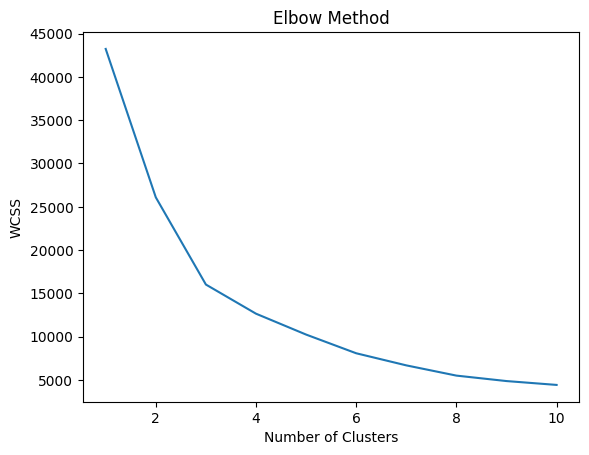

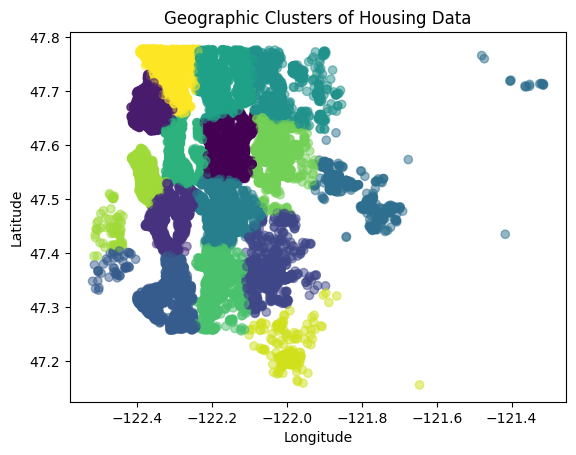

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your housing dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('raw-data-DM.csv')

# Extract relevant features (latitude and longitude)
coordinates = df[['lat', 'long']]

# Standardize the data
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(coordinates_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 15

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster1'] = kmeans.fit_predict(coordinates_scaled)

# Visualize the clusters on a map (using matplotlib or other mapping libraries)
plt.scatter(df['long'], df['lat'], c=df['cluster1'], cmap='viridis', marker='o', alpha=0.5)
plt.title('Geographic Clusters of Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


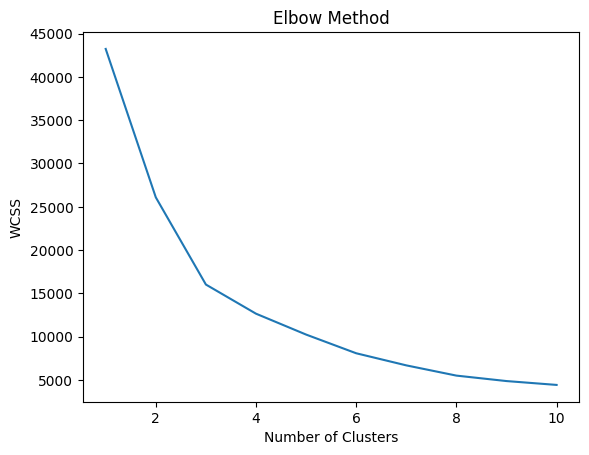

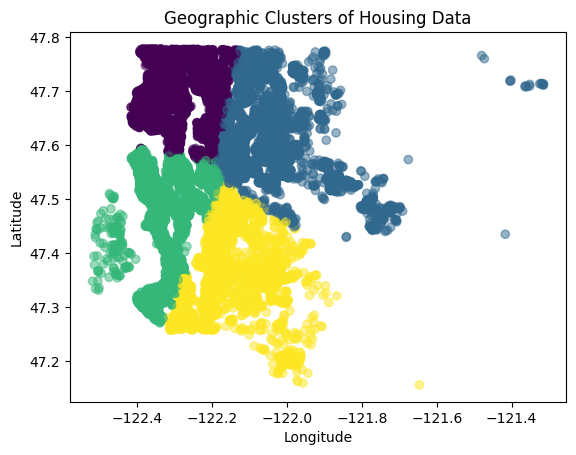

Distance between points 0 and 1: 23.79 km


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

# Haversine formula for distance calculation
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    radius = 6371.0  # Radius of the Earth in kilometers
    distance = radius * c
    return distance

# Load your housing dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('kingcounty(Curr).csv')

# Extract relevant features (latitude and longitude)
coordinates = df[['lat', 'long']]

# Standardize the data
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(coordinates_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster1'] = kmeans.fit_predict(coordinates_scaled)

# Visualize the clusters on a map (using matplotlib or other mapping libraries)
plt.scatter(df['long'], df['lat'], c=df['cluster1'], cmap='viridis', marker='o', alpha=0.5)
plt.title('Geographic Clusters of Housing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Example: Calculate distance between two points
lat1, lon1 = df.loc[0, 'lat'], df.loc[0, 'long']
lat2, lon2 = df.loc[1, 'lat'], df.loc[1, 'long']
distance_km = haversine(lat1, lon1, lat2, lon2)
print(f'Distance between points 0 and 1: {distance_km:.2f} km')


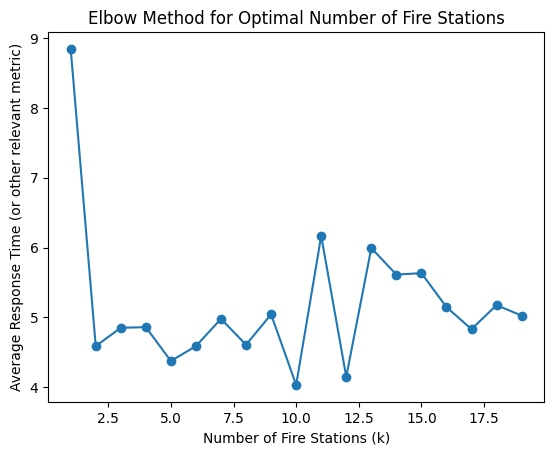

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data (replace this with your own data)
population_density = np.random.uniform(0, 1, 1000000)
response_time = np.random.uniform(1, 10, 100)

# Calculate a metric (e.g., average response time) for different numbers of fire stations
k_values = range(1, 20)
metric_values = []

for k in k_values:
    # Simulate fire station placement and calculate the metric
    # This is a placeholder - replace it with your own logic based on your data
    metric = np.mean(np.random.choice(response_time, k))
    metric_values.append(metric)

# Plot the elbow method graph
plt.plot(k_values, metric_values, marker='o')
plt.title('Elbow Method for Optimal Number of Fire Stations')
plt.xlabel('Number of Fire Stations (k)')
plt.ylabel('Average Response Time (or other relevant metric)')
plt.show()


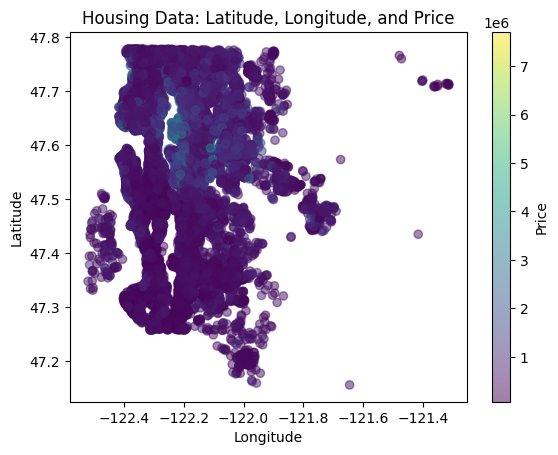

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your housing dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('kingcounty(Curr).csv')

# Extract relevant features (latitude, longitude, price)
location_data = df[['lat', 'long']]

df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True))

price_data = df['price']

# Standardize the location data
scaler = StandardScaler()
location_data_scaled = scaler.fit_transform(location_data)

# Plot the data with color representing the price
plt.scatter(df['long'], df['lat'], c=price_data, cmap='viridis', marker='o', alpha=0.5)
plt.title('Housing Data: Latitude, Longitude, and Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price')
plt.show()


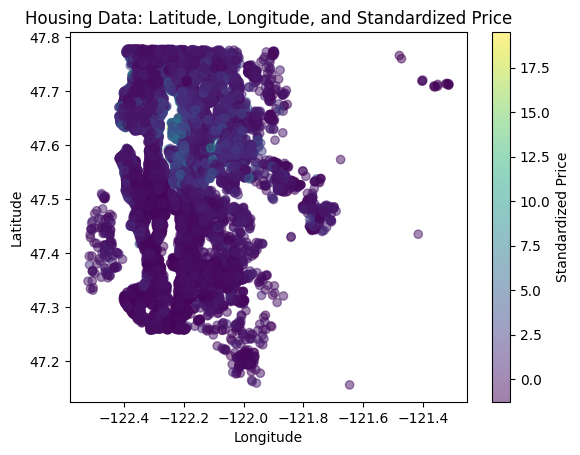

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your housing dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('raw-data-DM.csv')

# Extract relevant features (latitude, longitude, price)
location_data = df[['lat', 'long']]
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')  # Convert 'price' to numeric

# Handle missing or non-numeric values in the 'price' column
df['price'].fillna(df['price'].mean(), inplace=True)

# Standardize the location data and price
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['lat', 'long', 'price']])

# Plot the data with color representing the standardized price
plt.scatter(df['long'], df['lat'], c=data_scaled[:, 2], cmap='viridis', marker='o', alpha=0.5)
plt.title('Housing Data: Latitude, Longitude, and Standardized Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Standardized Price')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   price (Nom)    21613 non-null  object 
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


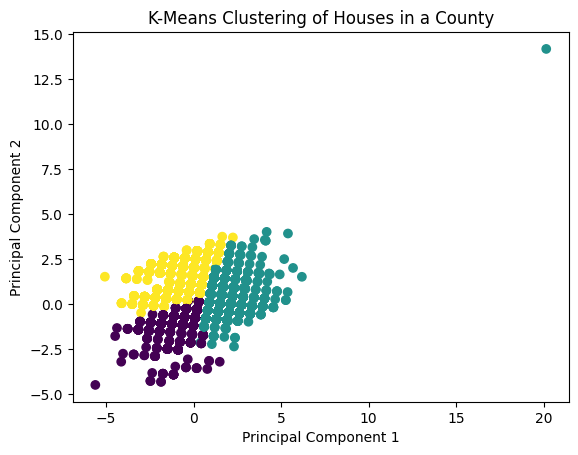

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your housing data from the CSV file
file_path = 'raw-data-DM.csv'
data = pd.read_csv(file_path)

# Assuming you have columns like 'feature1', 'feature2', ..., 'featureN'
# Select the features you want to include in the clustering
selected_features = data[['grade', 'bedrooms', 'condition']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Choose the number of clusters (you may need to experiment with this)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Optionally, you can reduce dimensionality for visualization
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)

# Visualize the clusters in a 2D plot
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering of Houses in a County')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_features, data['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.39429392625491944


In [ ]:
cluster_profiles = data.groupby('cluster').mean()
print(cluster_profiles)


                   id  bedrooms  bathrooms  sqft_living      sqft_lot  \
cluster                                                                 
0        4.667373e+09  2.918697   1.863727  1620.113642  11913.910954   
1        4.576005e+09  4.150394   2.767010  3010.438636  20324.056297   
2        4.468727e+09  3.238434   1.834971  1815.714847  14442.737526   

           floors  waterfront      view  condition     grade   sqft_above  \
cluster                                                                     
0        1.480301    0.003530  0.112275   2.975632  7.138010  1434.920633   
1        1.801834    0.012707  0.419656   3.125623  8.915393  2638.313174   
2        1.223843    0.008013  0.222105   4.252192  7.162836  1458.817962   

         sqft_basement     yr_built  yr_renovated       zipcode        lat  \
cluster                                                                      
0           185.193008  1972.058643    100.936461  98087.275678  47.561270   
1           37

<ipython-input-27-d42ff96bfea5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = data.groupby('cluster').mean()
